In [1]:
pip install pycaret

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/eb/43/ec8d59a663e0a1a67196b404ec38ccb0051708bad74a48c80d96c61dd0e5/pycaret-3.2.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 47.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 46.0 MB/s eta 0:00:0000:010:01
  Obtaining dependency information for plotly-resampler>=0.8.3.1 from https://files.pythonhosted.org/packages/c7/17/a4874896ad254a05259f8e8ae5130b0ec5cd2737fcc5b620dbc41a92dfac/plotly_resampler-0.9.2-py3-none-any.whl.metadata
  Obtaining dependency information for pmdarima!=1.8.1,<3.0.0,>=1.8.0 from https://files.pythonhosted.org/packages/ec/2b/e7d18360d56396b62781ba4616527af49244d4bed51f0780646fa3953cc8/pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata
     ━━━━━━━━━━━

In [2]:
pip install interpret

  Obtaining dependency information for interpret from https://files.pythonhosted.org/packages/69/48/a027d4c682c73177eba3eec7c384586cf14381de2495e2d4a30c16356102/interpret-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for interpret-core[dash,debug,linear,notebook,plotly,sensitivity,shap]==0.5.0 from https://files.pythonhosted.org/packages/33/f1/8a35f18be730ec6a5b6270663230b608c156b6e24e5f5d41882fc70dae93/interpret_core-0.5.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 23.5 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for gevent>=1.3.6 from https://files.pythonhosted.org/packages/77/69/9d5337a2641ab14c4152b4d980252527924fa2447d9bdaa88f56ced92ac7/gevent-23.9.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 38.7 MB/s eta 0:00:00
  Obtaining dependency information for zope.event from https://files.pythonhosted.org/packages/fe/42/f8dbc2b9ad59e927940325a22d6d

In [3]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as ps
import seaborn as sns
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingClassifier
from interpret.blackbox import LimeTabular, ShapKernel, MorrisSensitivity, PartialDependence
import lime
import lime.lime_tabular
from interpret.perf import ROC

# Charger le jeu de données
import pandas as pd
from pycaret.datasets import get_data
from pycaret.classification import *

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE
import scikitplot as skplt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')
!pip install pywaffle

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv
  Obtaining dependency information for fontawesomefree from https://files.pythonhosted.org/packages/8f/fc/295f4f71fc157de68dcf25a4850953e61f6eca644e7416f10a281ed42441/fontawesomefree-6.5.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 35.7 MB/s eta 0:00:00:00:0100:01


In [6]:
df=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [11]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
#plot graph for individual columns

In [13]:
sns.countplot(x=df['gender'])

<Axes: xlabel='gender', ylabel='count'>

In [14]:
sns.countplot(x=df['ever_married'])

<Axes: xlabel='ever_married', ylabel='count'>

In [15]:
sns.countplot(x=df['work_type'])

<Axes: xlabel='work_type', ylabel='count'>

<Axes: xlabel='Residence_type', ylabel='count'>

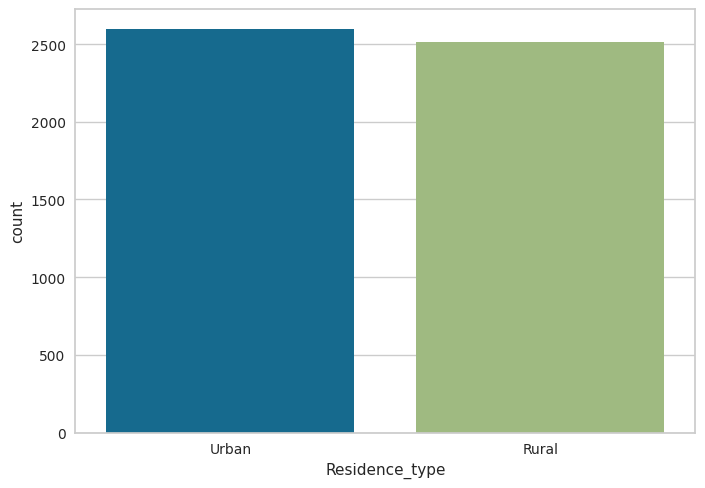

In [16]:
sns.countplot(x=df['Residence_type'])

In [17]:
sns.countplot(x=df['smoking_status'])

<Axes: xlabel='smoking_status', ylabel='count'>

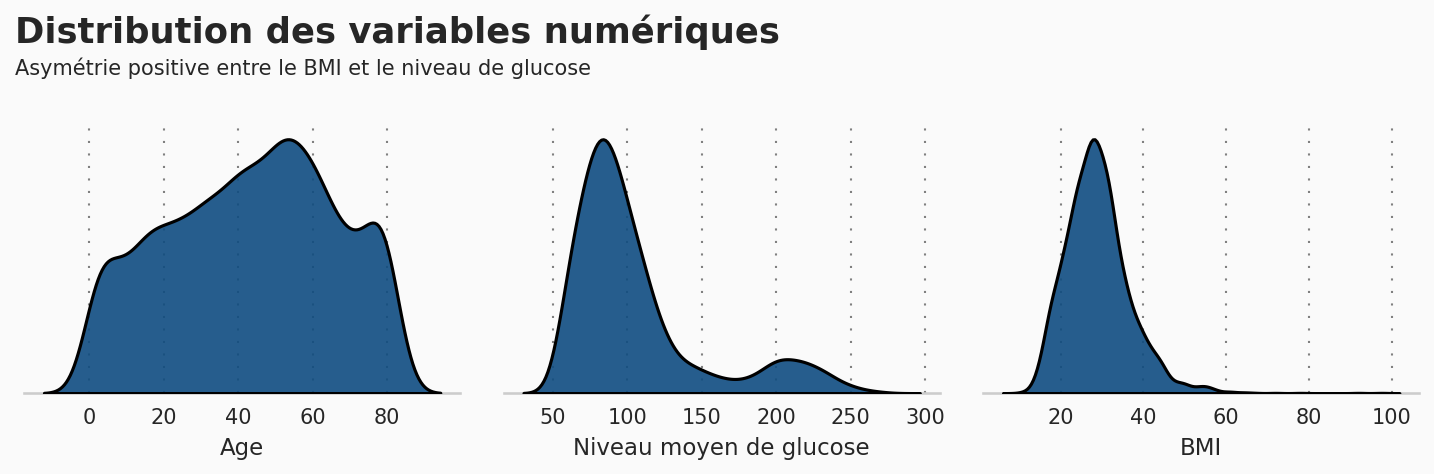

In [18]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]
conts = ['age','avg_glucose_level','bmi']


fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(variable) removed this for aesthetics
        plot += 1
        
ax0.set_xlabel('Age')
ax1.set_xlabel('Niveau moyen de glucose')
ax2.set_xlabel('BMI')

ax0.text(-20, 0.022, 'Distribution des variables numériques', fontsize=17, fontweight='bold', fontfamily='calibri')
ax0.text(-20, 0.02, 'Asymétrie positive entre le BMI et le niveau de glucose', fontsize=10, fontweight='light', fontfamily='calibri')

plt.show()

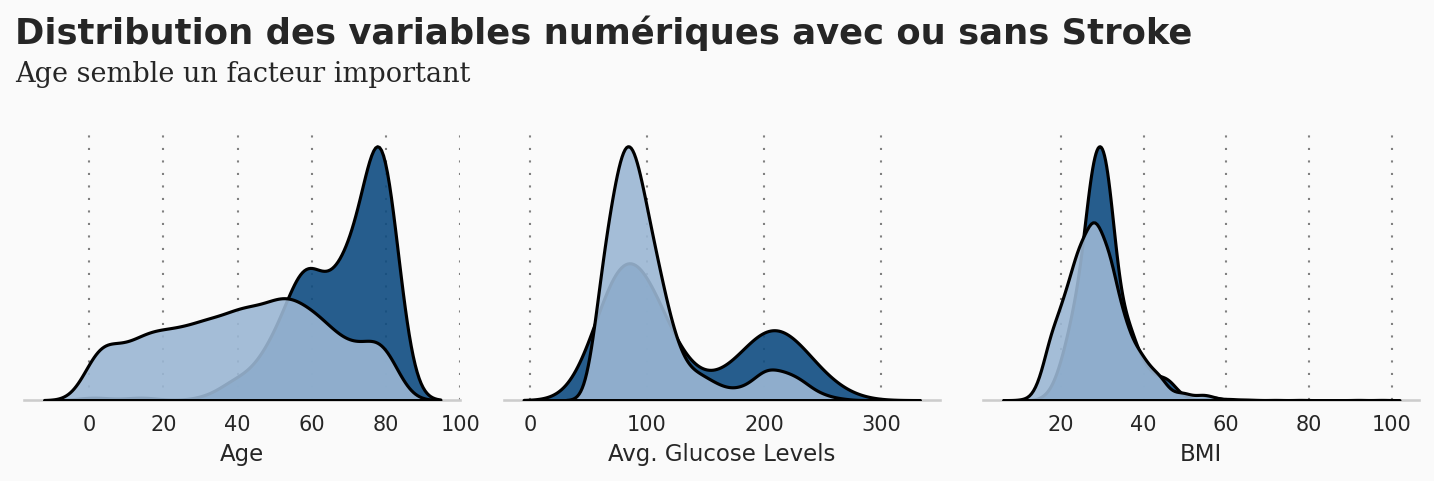

In [19]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')
        
ax0.text(-20, 0.056, 'Distribution des variables numériques avec ou sans Stroke', fontsize=17, fontweight='bold', fontfamily='calibri')
ax0.text(-20, 0.05, 'Age semble un facteur important', fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

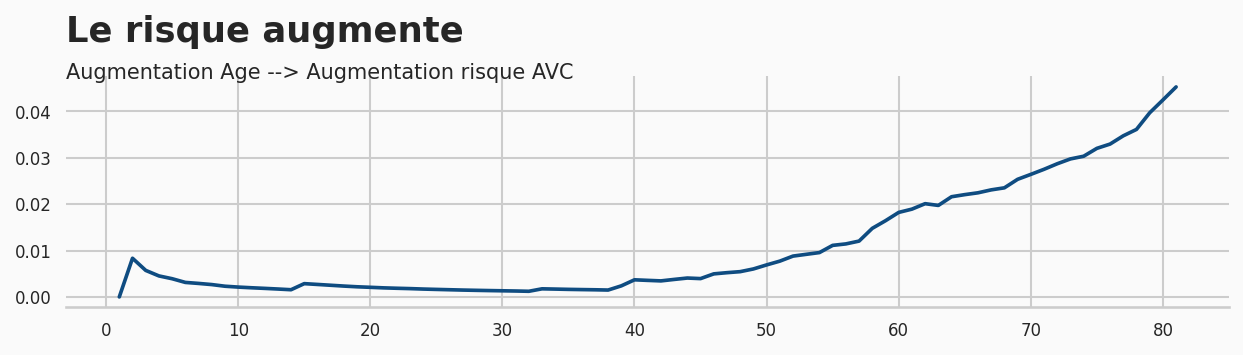

In [20]:
fig = plt.figure(figsize=(10, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)


df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke']))

sns.lineplot(data=rate,color='#0f4c81',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)
ax0.text(-3,0.055,'Le risque augmente',fontsize=17,fontfamily='calibri',fontweight='bold')
ax0.text(-3,0.047,'Augmentation Age --> Augmentation risque AVC',fontsize=10,fontfamily='calibri')

plt.show()

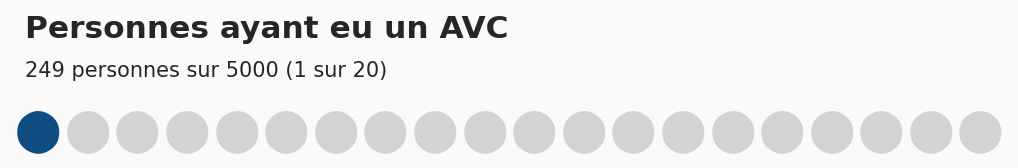

In [21]:
from pywaffle import Waffle

fig = plt.figure(figsize=(7, 2),dpi=150,facecolor=background_color,
    FigureClass=Waffle,
    rows=1,
    values=[1, 19],
    colors=['#0f4c81', "lightgray"],
    characters='⬤',
    font_size=20,vertical=True,
)

fig.text(0.035,0.78,'Personnes ayant eu un AVC',fontfamily='calibri',fontsize=15,fontweight='bold')
fig.text(0.035,0.65,'249 personnes sur 5000 (1 sur 20)',fontfamily='calibri',fontsize=10)

plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
df.head()

id  gender  age  hypertension  heart_disease ever_married  \
0   9046    Male   67             0              1          Yes   
1  51676  Female   61             0              0          Yes   
2  31112    Male   80             0              1          Yes   
3  60182  Female   49             0              0          Yes   
4   1665  Female   79             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.879487   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

In [24]:
a=pd.get_dummies(df.gender)
b=pd.get_dummies(df.ever_married)
c=pd.get_dummies(df.work_type)
d=pd.get_dummies(df.Residence_type)
e=pd.get_dummies(df.smoking_status)

In [25]:
merged=pd.concat([df, a, b, c, d, e,], axis='columns')
merged.head()

id  gender  age  hypertension  heart_disease ever_married  \
0   9046    Male   67             0              1          Yes   
1  51676  Female   61             0              0          Yes   
2  31112    Male   80             0              1          Yes   
3  60182  Female   49             0              0          Yes   
4   1665  Female   79             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  ...  \
0        Private          Urban             228.69  36.600000  ...   
1  Self-employed          Rural             202.21  29.879487  ...   
2        Private          Rural             105.92  32.500000  ...   
3        Private          Urban             171.23  34.400000  ...   
4  Self-employed          Rural             174.12  24.000000  ...   

  Never_worked  Private  Self-employed  children  Rural  Urban  Unknown  \
0            0        1              0         0      0      1        0   
1            0        0              1         0      1      0        0   
2            0        1              0         0      1      0        0   
3            0        1              0         0      0      1        0   
4            0        0              1         0      1      0        0   

   formerly smoked  never smoked  smokes  
0                1             0       0  
1                0             1       0  
2                0             1       0  
3                0             0       1  
4                0             1       0  

[5 rows x 28 columns]

In [26]:
data=merged.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'Male', 'Yes', 'Private', 'Urban', 'formerly smoked'], axis='columns')
data.head()

id  age  hypertension  heart_disease  avg_glucose_level        bmi  \
0   9046   67             0              1             228.69  36.600000   
1  51676   61             0              0             202.21  29.879487   
2  31112   80             0              1             105.92  32.500000   
3  60182   49             0              0             171.23  34.400000   
4   1665   79             1              0             174.12  24.000000   

   stroke  Female  Other  No  Govt_job  Never_worked  Self-employed  children  \
0       1       0      0   0         0             0              0         0   
1       1       1      0   0         0             0              1         0   
2       1       0      0   0         0             0              0         0   
3       1       1      0   0         0             0              0         0   
4       1       1      0   0         0             0              1         0   

   Rural  Unknown  never smoked  smokes  
0      0        0             0       0  
1      1        0             1       0  
2      1        0             1       0  
3      0        0             0       1  
4      1        0             1       0

In [27]:
data.drop(['id'],inplace=True,axis=1)

In [28]:
dff=data.apply(le.fit_transform)

In [29]:
x=dff.drop('stroke', axis='columns')
y=dff.stroke

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

# prediction avec pycaret

In [32]:
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingClassifier
from interpret.blackbox import LimeTabular, ShapKernel, MorrisSensitivity, PartialDependence
import lime
import lime.lime_tabular
from interpret.perf import ROC
# Charger le jeu de données
import pandas as pd
from pycaret.datasets import get_data

from pycaret.regression import *


# Initialiser l'environnement PyCaret
clf1 = setup(data=dff, target='stroke')

# Créer et comparer plusieurs modèles
models_to_compare = ['lr', 'dt', 'rf', 'ada', 'knn']

# Sélectionner les meilleurs modèles en fonction de la métrique MAE
best_model = compare_models(include=models_to_compare, sort='MAE')

# Afficher le modèle sélectionné
print(best_model)

# Évaluer le modèle sur l'ensemble de test
evaluate_model(best_model)


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

KNeighborsRegressor(n_jobs=-1)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [33]:
# Create and compare multiple models
models_to_compare = ['lr', 'dt', 'rf', 'ada', 'knn']

for model_name in models_to_compare:
    # Creating a model
    current_model = create_model(model_name)
    
    # Train the model
    current_model.fit(X_train, y_train)

    # Create a blackbox model using the trained model
    blackbox_model = current_model

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [34]:
dff.head()

age  hypertension  heart_disease  avg_glucose_level  bmi  stroke  Female  \
0   67             0              1               3850  349       1       0   
1   61             0              0               3588  215       1       1   
2   80             0              1               2483  294       1       0   
3   49             0              0               3385  325       1       1   
4   79             1              0               3394  127       1       1   

   Other  No  Govt_job  Never_worked  Self-employed  children  Rural  Unknown  \
0      0   0         0             0              0         0      0        0   
1      0   0         0             0              1         0      1        0   
2      0   0         0             0              0         0      1        0   
3      0   0         0             0              0         0      0        0   
4      0   0         0             0              1         0      1        0   

   never smoked  smokes  
0             0       0  
1             1       0  
2             1       0  
3             0       1  
4             1       0

In [35]:
y_train.value_counts()

0    3898
1     190
Name: stroke, dtype: int64

In [36]:
dff['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [37]:
y_test.value_counts()

0    963
1     59
Name: stroke, dtype: int64

# Application de l'ia explicable

# Local Explanations: How an individual prediction was made

In [45]:
 # Explainability using LIME
for model_name in models_to_compare:
    # Train the model
    current_model.fit(X_train, y_train)
    # Create a blackbox model using the trained model
    blackbox_model = current_model
    lime = LimeTabular(blackbox_model, X_train, random_state=1)
    lime_local = lime.explain_local(X_test[:5], y_test[:5], name=f'LIME_{model_name}')
    show(lime_local, 0)

In [39]:
 # SHAP explanation
for model_name in models_to_compare:
    # Train the model
    current_model.fit(X_train, y_train)
    # Create a blackbox model using the trained model
    blackbox_model = current_model
    background_val = pd.DataFrame(np.median(X_train, axis=0).reshape(1, -1), columns=x.columns)
    shap = ShapKernel(blackbox_model, background_val)
    shap_local = shap.explain_local(X_test[:5], y_test[:5], name=f'SHAP_{model_name}')
    show(shap_local, 0)


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

# Global Explanations: How the model behaves overall

In [46]:
for model_name in models_to_compare:
    # Train the model
    current_model.fit(X_train, y_train)
    # Create a blackbox model using the trained model
    blackbox_model = current_model
    # Morris Sensitivity
    sensitivity = MorrisSensitivity(blackbox_model, X_train)
    sensitivity_global = sensitivity.explain_global(name=f'Morris_{model_name}')
    show(sensitivity_global)

In [47]:
for model_name in models_to_compare: 
    # Train the model
    current_model.fit(X_train, y_train)

    # Create a blackbox model using the trained model
    blackbox_model = current_model
     # Marginal explanation
    marginal = Marginal().explain_data(X_train, y_train, name=f'Marginal_{model_name}')
    show(marginal)

In [48]:
for model_name in models_to_compare: 
    # Train the model
    current_model.fit(X_train, y_train)
    # Create a blackbox model using the trained model
    blackbox_model = current_model
    # Partial Dependence
    pdp = PartialDependence(blackbox_model, X_train)
    pdp_global = pdp.explain_global(name=f'PDP_{model_name}')
    show(pdp_global, 0)


In [43]:
from interpret import show
from interpret.perf import RegressionPerf
from sklearn.linear_model import LinearRegression
for model_name in models_to_compare:
   
    if model_name == 'lr':
        # Linear Regression
        lr = LinearRegression()
        lr.fit(X_train, y_train)

        # Performance Explanation
        lr_perf = RegressionPerf(lr).explain_perf(X_test, y_test, name='Linear Regression')
        show(lr_perf)

      

In [44]:
from sklearn.tree import DecisionTreeRegressor

for model_name in models_to_compare:

    if model_name == 'dt':
        # Decision Tree
        dt = DecisionTreeRegressor(random_state=seed)
        dt.fit(X_train, y_train)

        # Performance Explanation
        dt_perf = RegressionPerf(dt).explain_perf(X_test, y_test, name='Decision Tree')
        show(dt_perf)

NameError: name 'seed' is not defined

In [50]:
from sklearn.model_selection import GridSearchCV

n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}


rfc = RandomForestClassifier()

rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)

rfc.fit(X_train,y_train)

rfc_tuned_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))
print('F1 Score: ',f1_score(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       963
           1       0.00      0.00      0.00        59

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022

Accuracy Score:  0.9393346379647749
F1 Score:  0.0


In [ ]:
import shap  
!pip install matplotlib

import matplotlib

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

# custom colour plot
colors = ["#9bb7d4", "#0f4c81"]           
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
shap.summary_plot(shap_values[1], X_test,cmap=cmap,alpha=0.4)

In [ ]:
shap.dependence_plot('age', shap_values[1], X_test, interaction_index="age",cmap=cmap,alpha=0.4,show=False)
plt.title("Dependance a l'Age",loc='left',fontfamily='serif',fontsize=15)
plt.ylabel("Valeur SHAP pour l'Age")
plt.show()

In [ ]:
shap.dependence_plot('bmi', shap_values[1], X_test, interaction_index="bmi",cmap=cmap,alpha=0.4,show=False)
plt.title("Dependance au BMI",loc='left',fontfamily='serif',fontsize=15)
plt.ylabel("Valeur SHAP pour le BMI")
plt.show()

In [ ]:
from lime import lime_tabular
import numpy as np

# Create the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train),
                                               feature_names=X_train.columns,
                                               class_names=['Not Diagnosed', 'Diagnosed'],
                                               mode='classification')

# Choose a specific instance from the test set for which you want to explain the prediction
instance_index = 0  # Replace with the index of the instance you want to explain
instance = X_test.iloc[instance_index]

# Convert the Random Forest Classifier's predict_proba function to a function that takes a 2D array as input
predict_proba_fn = lambda x: rfc.predict_proba(x)

# Explain the prediction for the chosen instance
explanation = explainer.explain_instance(data_row=instance.values, predict_fn=predict_proba_fn)

# Print the explanation
explanation.show_in_notebook(show_table=True)

In [ ]:
import lime
import lime.lime_tabular

# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X.values, feature_names=X.columns.values.tolist(),
                                                  class_names=['stroke'], verbose=True, mode='classification')

In [ ]:
# Scale our data in pipeline, then split

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])


rf_pipeline.fit(X_train,y_train)
svm_pipeline.fit(X_train,y_train)
logreg_pipeline.fit(X_train,y_train)

In [ ]:
rf_cv = cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')

# Ajuster le pipeline sur les données non mises à l'échelle
lime_pipeline.fit(X_train, y_train)

# Choisissez l'instance que vous souhaitez expliquer
j = 1
exp = explainer.explain_instance(X.values[j], lime_pipeline.predict_proba, num_features=5)

In [ ]:
# Show the predictions
exp.show_in_notebook(show_table=True)